<img src="small_images.jpg" />

In [2]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
dataset_dir = "dataset"

In [4]:
class_labels = ['bike', 'car', 'truck', 'cart', 'bicycle']
class_directories = ['bike', 'car', 'truck','cart','bicycle']

In [5]:
image_width, image_height = 224, 224
input_shape = (image_width, image_height, 3)
num_classes = len(class_labels)
test_size = 0.2
random_state = 42
epochs = 10
batch_size = 32

In [6]:
images = []
labels = []

In [7]:
for i, class_dir in enumerate(class_directories):
    dir_path = os.path.join(dataset_dir, class_dir)
    images_list = os.listdir(dir_path)
    for image_name in images_list:
        image_path = os.path.join(dir_path, image_name)
        try:
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (image_width, image_height))
            images.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error occurred while processing image: {image_path}")
            print(f"Error message: {str(e)}")

In [8]:
X = np.array(images)
y = np.array(labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

X_test.shape

(794, 224, 224, 3)

In [10]:
y_test.shape

(794,)

In [11]:
X_train.shape

(3176, 224, 224, 3)

In [12]:
y_train.shape

(3176,)

In [92]:
y_train[:10]

array([1, 1, 0, 2, 2, 4, 0, 0, 2, 0])

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    label_index = y[index]
    class_label = class_labels[label_index]
    plt.xlabel(class_label)

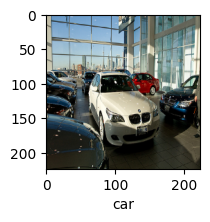

In [16]:
plot_sample(X_train, y_train, 0)

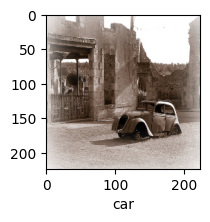

In [17]:
plot_sample(X_train, y_train, 1)

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [20]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
dataset_dir

'dataset'

In [22]:
len(X_train)

3176

In [23]:
len(y_train)

3176

In [24]:

cnn.fit(X_train, y_train, epochs=epochs)


Epoch 1/10
100/100 [==============================] - 145s 1s/step - loss: 1.3028 - accuracy: 0.6077
Epoch 2/10
100/100 [==============================] - 127s 1s/step - loss: 0.4383 - accuracy: 0.8501
Epoch 3/10
100/100 [==============================] - 115s 1s/step - loss: 0.1655 - accuracy: 0.9477
Epoch 4/10
100/100 [==============================] - 114s 1s/step - loss: 0.0518 - accuracy: 0.9877
Epoch 5/10
100/100 [==============================] - 115s 1s/step - loss: 0.0276 - accuracy: 0.9943
Epoch 6/10
100/100 [==============================] - 112s 1s/step - loss: 0.0095 - accuracy: 0.9984
Epoch 7/10
100/100 [==============================] - 110s 1s/step - loss: 0.0130 - accuracy: 0.9981
Epoch 8/10
100/100 [==============================] - 109s 1s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
100/100 [==============================] - 110s 1s/step - loss: 5.6849e-04 - accuracy: 1.0000
Epoch 10/10
100/100 [==============================] - 109s 1s/step - loss: 3.6999e-04 

In [25]:
cnn.evaluate(X_test,y_test)

25/25 [==============================] - 9s 230ms/step - loss: 1.1239 - accuracy: 0.8010


[1.1239252090454102, 0.8010075688362122]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

25/25 [==============================] - 8s 322ms/step


array([[1.6495815e-06, 9.9225777e-01, 7.5254422e-03, 4.2437699e-07,
        2.1470345e-04],
       [1.0000000e+00, 1.0009564e-18, 3.8084782e-17, 3.4307206e-20,
        1.4884103e-23],
       [1.3678821e-05, 9.9987638e-01, 1.0988512e-04, 6.2933695e-12,
        4.4133919e-09],
       [1.0000000e+00, 1.4790346e-08, 3.5836409e-10, 2.4400856e-14,
        3.5596570e-16],
       [2.2262984e-06, 9.2557478e-01, 7.4421585e-02, 1.4636418e-06,
        5.0137494e-10]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 0, 1, 0, 1]

In [90]:
y_test[:5]

array([1, 0, 1, 0, 2, 0, 1, 1, 1, 1])

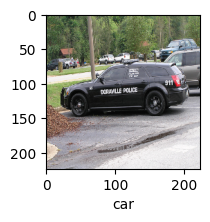

In [29]:
plot_sample(X_test, y_test,0)

In [155]:
def predict(y_pred):
    predict = np.argmax(y_pred)
    if predict==0: print("bike")
    elif predict==1: print("car")
    elif predict==2: print("truck")
    elif predict==3: print("cart")        
    elif predict==4: print("bicycle")        
    else: print("none")

In [251]:
predict(y_pred[33])

cart


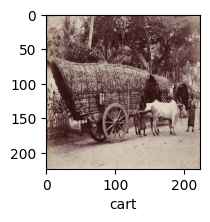

In [250]:
plot_sample(X_test, y_test,33)

In [248]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (image_width, image_height))
    image = image / 255.0  # Normalize the image
    return image

def predict_image(image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)
    prediction = cnn.predict(image)
    predicted_class = np.argmax(prediction)
    return class_labels[predicted_class]

def main():
    image_path = 'image.jpg'
    prediction = predict_image(image_path)
    print(prediction)

if __name__ == '__main__':
    main()

1/1 [==============================] - 0s 210ms/step
bike


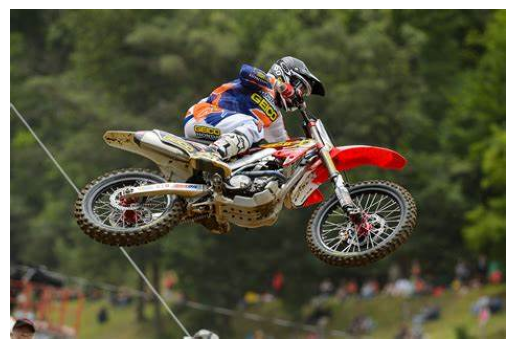

In [249]:
image_path = 'image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
cnn.save('model.h5')